In [1]:
from assignment4_helpers import *

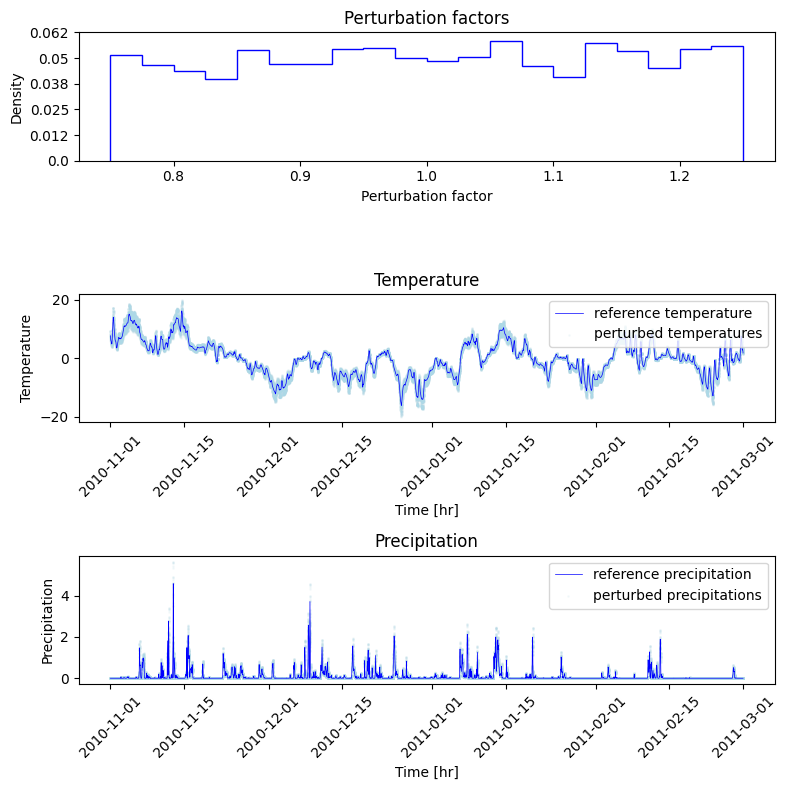

In [12]:
# Perturb input tem and ppt

num = 2000 #! later 2000

# ref_tem, tems, ref_ppt, ppts, perturbation_factors = perturb_inputs(num=num)
main_dir = Path(r'/Users/elias/Desktop/HWS24/MMUQ Seminar/time_series__24163005')
os.chdir(main_dir)
x_labels = pd.read_csv(r'time_series___24163005.csv', sep=';', index_col=0)
x_labels.index = pd.to_datetime(x_labels.index, format='%Y-%m-%d-%H')

main_dir = Path(r'/Users/elias/Desktop/HWS24/MMUQ Seminar/mmuq_seminar/project1/hmg/test/assignment4_data')
save_dir = os.path.join(main_dir, "assignment4_data")
recalib_params = np.load(os.path.join(main_dir, 'recalib_params.npy'))
recalib_obj_values = np.load(os.path.join(main_dir, 'recalib_obj_values.npy'))
ref_params = np.load(os.path.join(main_dir, 'ref_params.npy'))
ref_obj_value = np.load(os.path.join(main_dir, 'ref_obj_value.npy'))
perturbation_factors = np.load(os.path.join(main_dir, 'perturbation_factors.npy'))
tems = np.load(os.path.join(main_dir, 'tems.npy'))
ppts = np.load(os.path.join(main_dir, 'ppts.npy'))

main_dir = Path(r'/Users/elias/Desktop/HWS24/MMUQ Seminar/time_series__24163005')
os.chdir(main_dir)
inp_dfe = pd.read_csv(r'time_series___24163005.csv', sep=';', index_col=0)
inp_dfe.index = pd.to_datetime(inp_dfe.index, format='%Y-%m-%d-%H')
ref_tem = inp_dfe.loc[:, 'tavg__ref'].values # reference temperature
ref_ppt = inp_dfe.loc[:, 'pptn__ref'].values # reference preciptiation


fig = plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.hist(perturbation_factors, bins=20, density=False, histtype='step', color='blue', label='perturbation factors')
locs, _ = plt.yticks() 
plt.yticks(locs,np.round(locs/len(perturbation_factors),3))
plt.title("Perturbation factors")
plt.xlabel('Perturbation factor')
plt.ylabel('Density')

plt.subplot(3, 1, 2)
plt.plot(x_labels.index, ref_tem, label="reference temperature", color='blue', linewidth=0.5)
for i in range(20): #! here use tems.shape[0]
    if i == 0:
        plt.scatter(x_labels.index, tems[i], alpha=0.1, color='lightblue', s=1, label="perturbed temperatures")
    else:
        plt.scatter(x_labels.index, tems[i], alpha=0.1, color='lightblue', s=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Temperature')
plt.title("Temperature")


plt.subplot(3, 1, 3)
plt.plot(x_labels.index, ref_ppt, label="reference precipitation", color='blue', linewidth=0.5)
for i in range(20): #! here use ppts.shape[0]
    if i == 0:
        plt.scatter(x_labels.index, ppts[i], alpha=0.1, color='lightblue', s=1, label="perturbed precipitations")
    plt.scatter(x_labels.index, ppts[i], alpha=0.1, color='lightblue', s=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Precipitation')
plt.title("Precipitation")

plt.tight_layout()
plt.show()

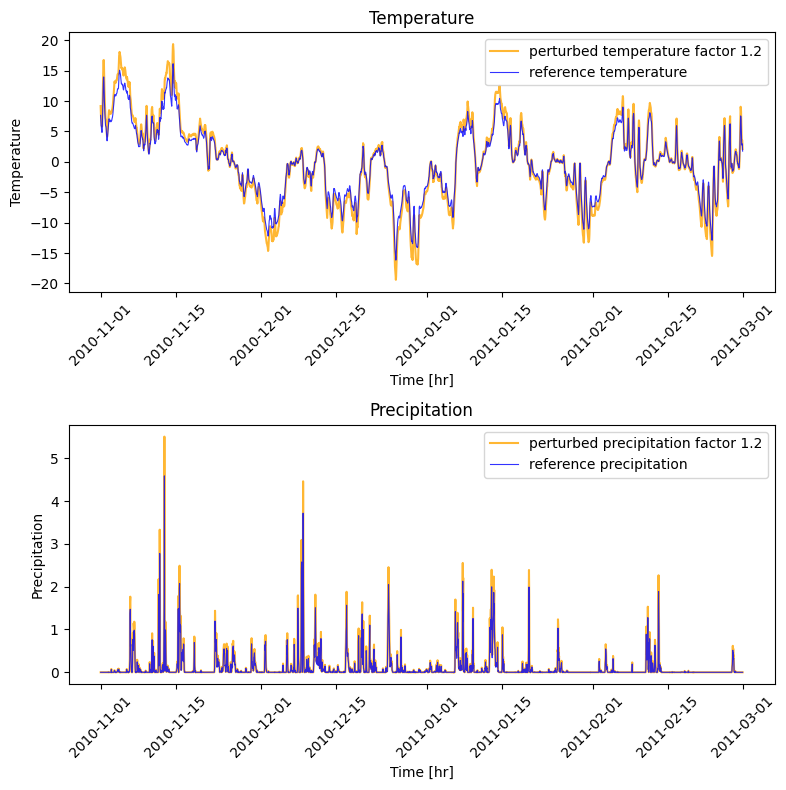

In [5]:
# Show one single perturbation for tem and ppt
fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(x_labels.index, ref_tem * 1.2, label="perturbed temperature factor 1.2", color='orange', alpha=0.8)
plt.plot(x_labels.index, ref_tem, label="reference temperature", color='blue', alpha=0.8, linewidth=0.8)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Temperature')
plt.title("Temperature")

plt.subplot(2, 1, 2)
plt.plot(x_labels.index, ref_ppt * 1.2, label="perturbed precipitation factor 1.2", color='orange', alpha=0.8)
plt.plot(x_labels.index, ref_ppt, label="reference precipitation", color='blue', alpha=0.8, linewidth=0.8)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Time [hr]')
plt.ylabel('Precipitation')
plt.title("Precipitation")

plt.tight_layout()
plt.show()

In [6]:
# run model with perturbed inputs and recalibrate each time
# for num=200, maxiter_differential_evolution = 20 i takes 11.5 minutes
# for num=2000, maxiter_differential_evolution = 20 i takes 1 hour 35 minutes
# maxiter_differential_evolution = 20
# recalib_params, recalib_obj_values, ref_params, ref_obj_value = run_model_with_perturbed_inputs(tems, ppts, ref_tem, ref_ppt, maxiter_differential_evolution)


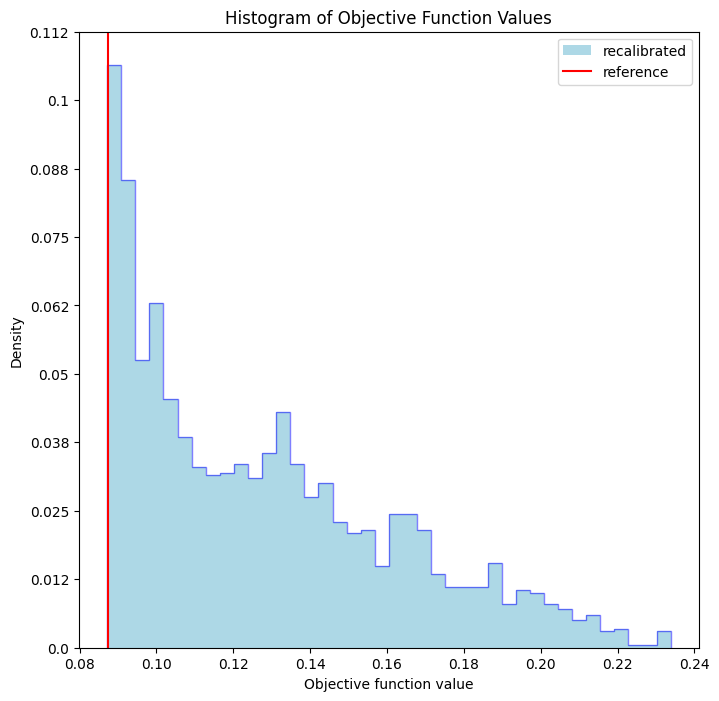

In [7]:
# Plot Histogram of objective function values
fig = plt.figure(figsize=(8, 8))
# sns.kdeplot(recalib_obj_values, color='blue', label='recalibrated')
plt.hist(recalib_obj_values, bins=40, density=False, histtype='stepfilled', color='lightblue', label='recalibrated')
plt.hist(recalib_obj_values, bins=40, density=False, histtype='step', color='blue', alpha=0.5)
locs, _ = plt.yticks() 
plt.yticks(locs,np.round(locs/len(perturbation_factors),3))
plt.axvline(ref_obj_value, color='red', label='reference')
plt.xlabel('Objective function value')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Objective Function Values')
plt.show()

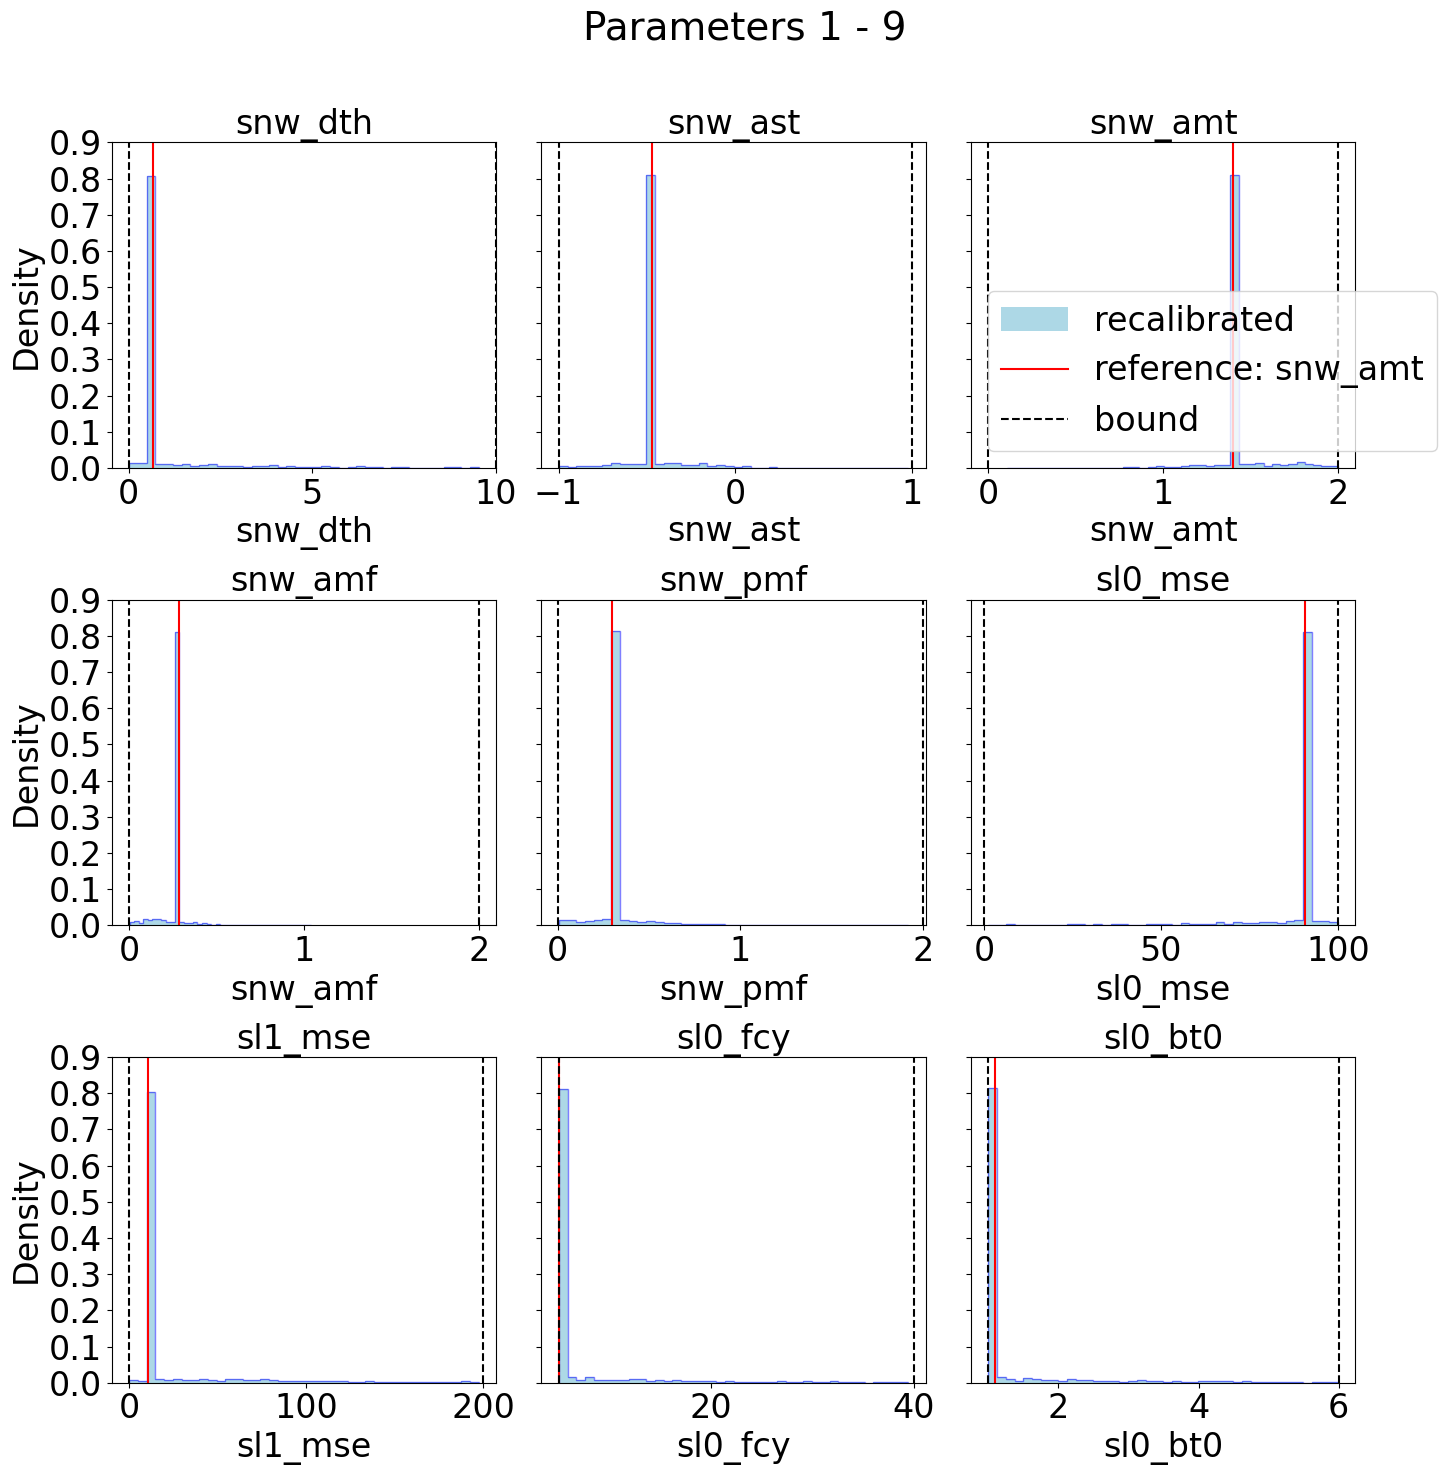

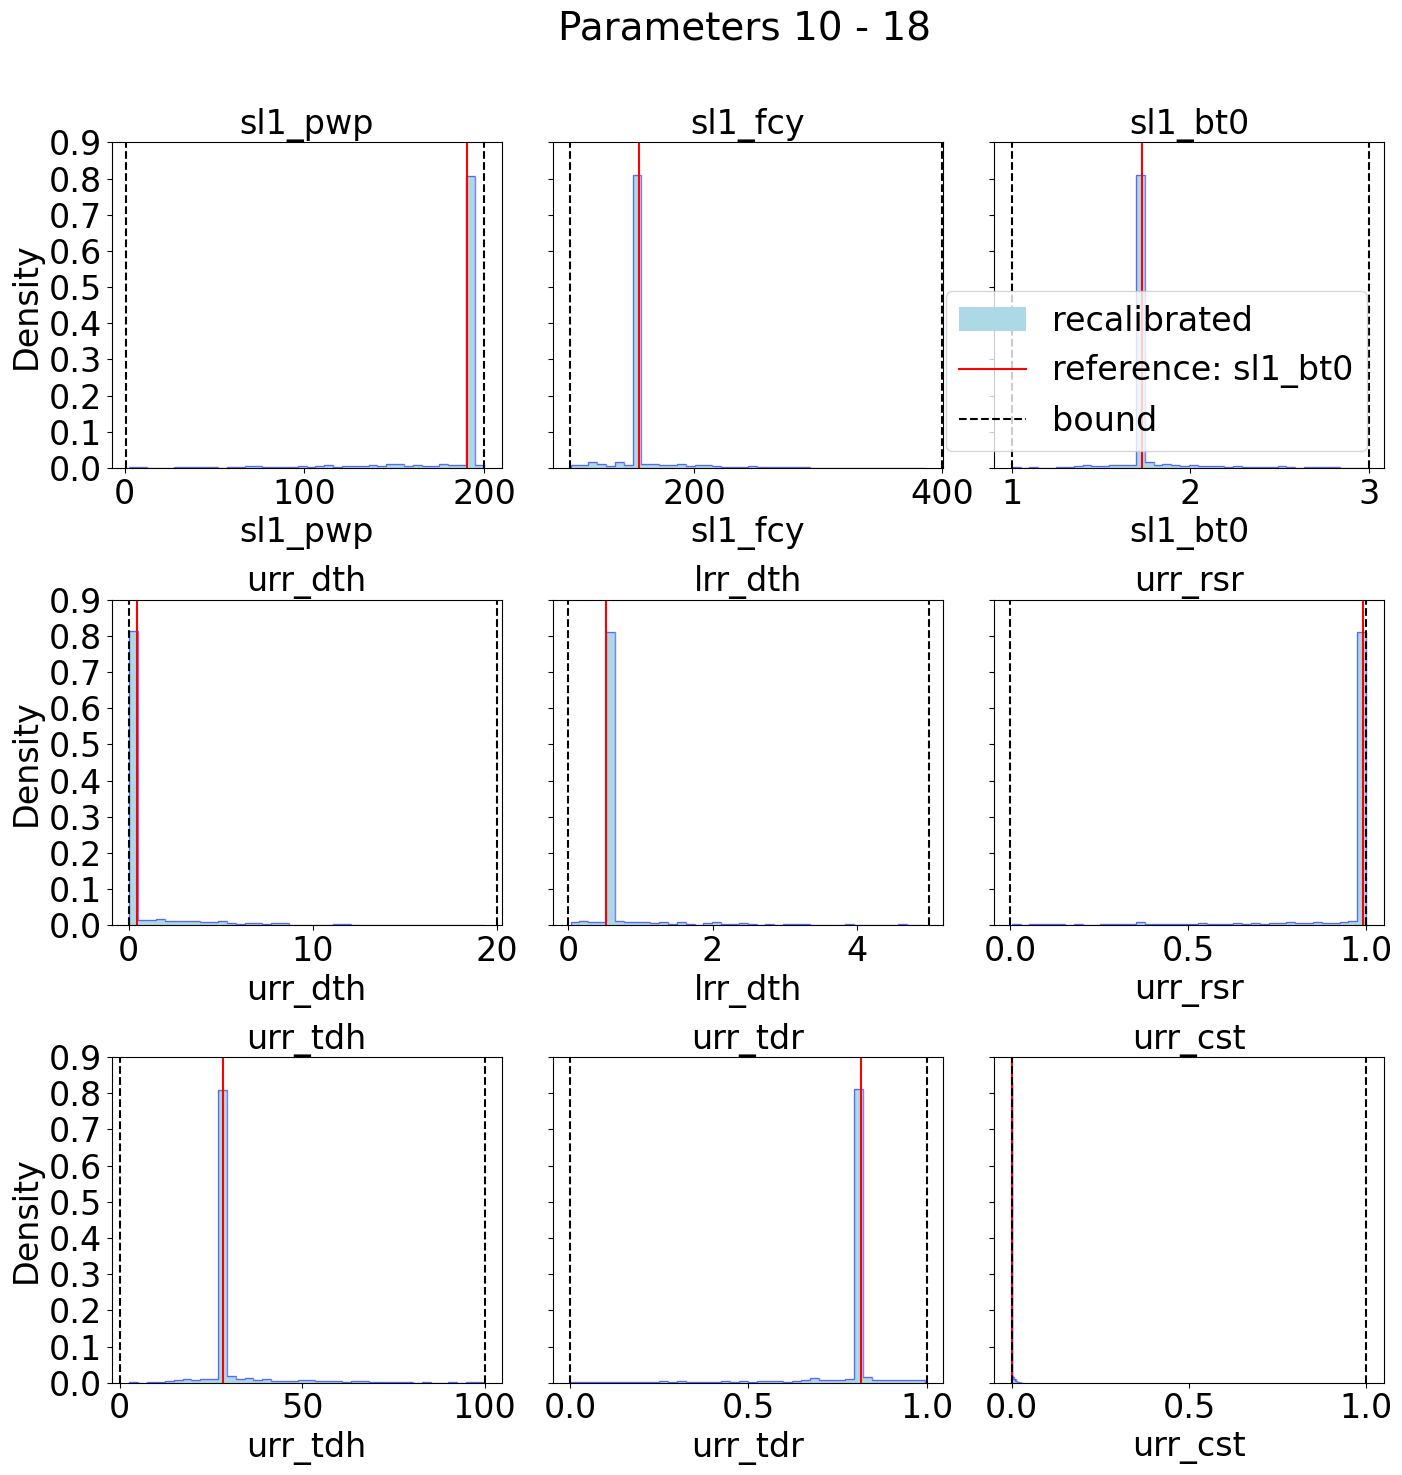

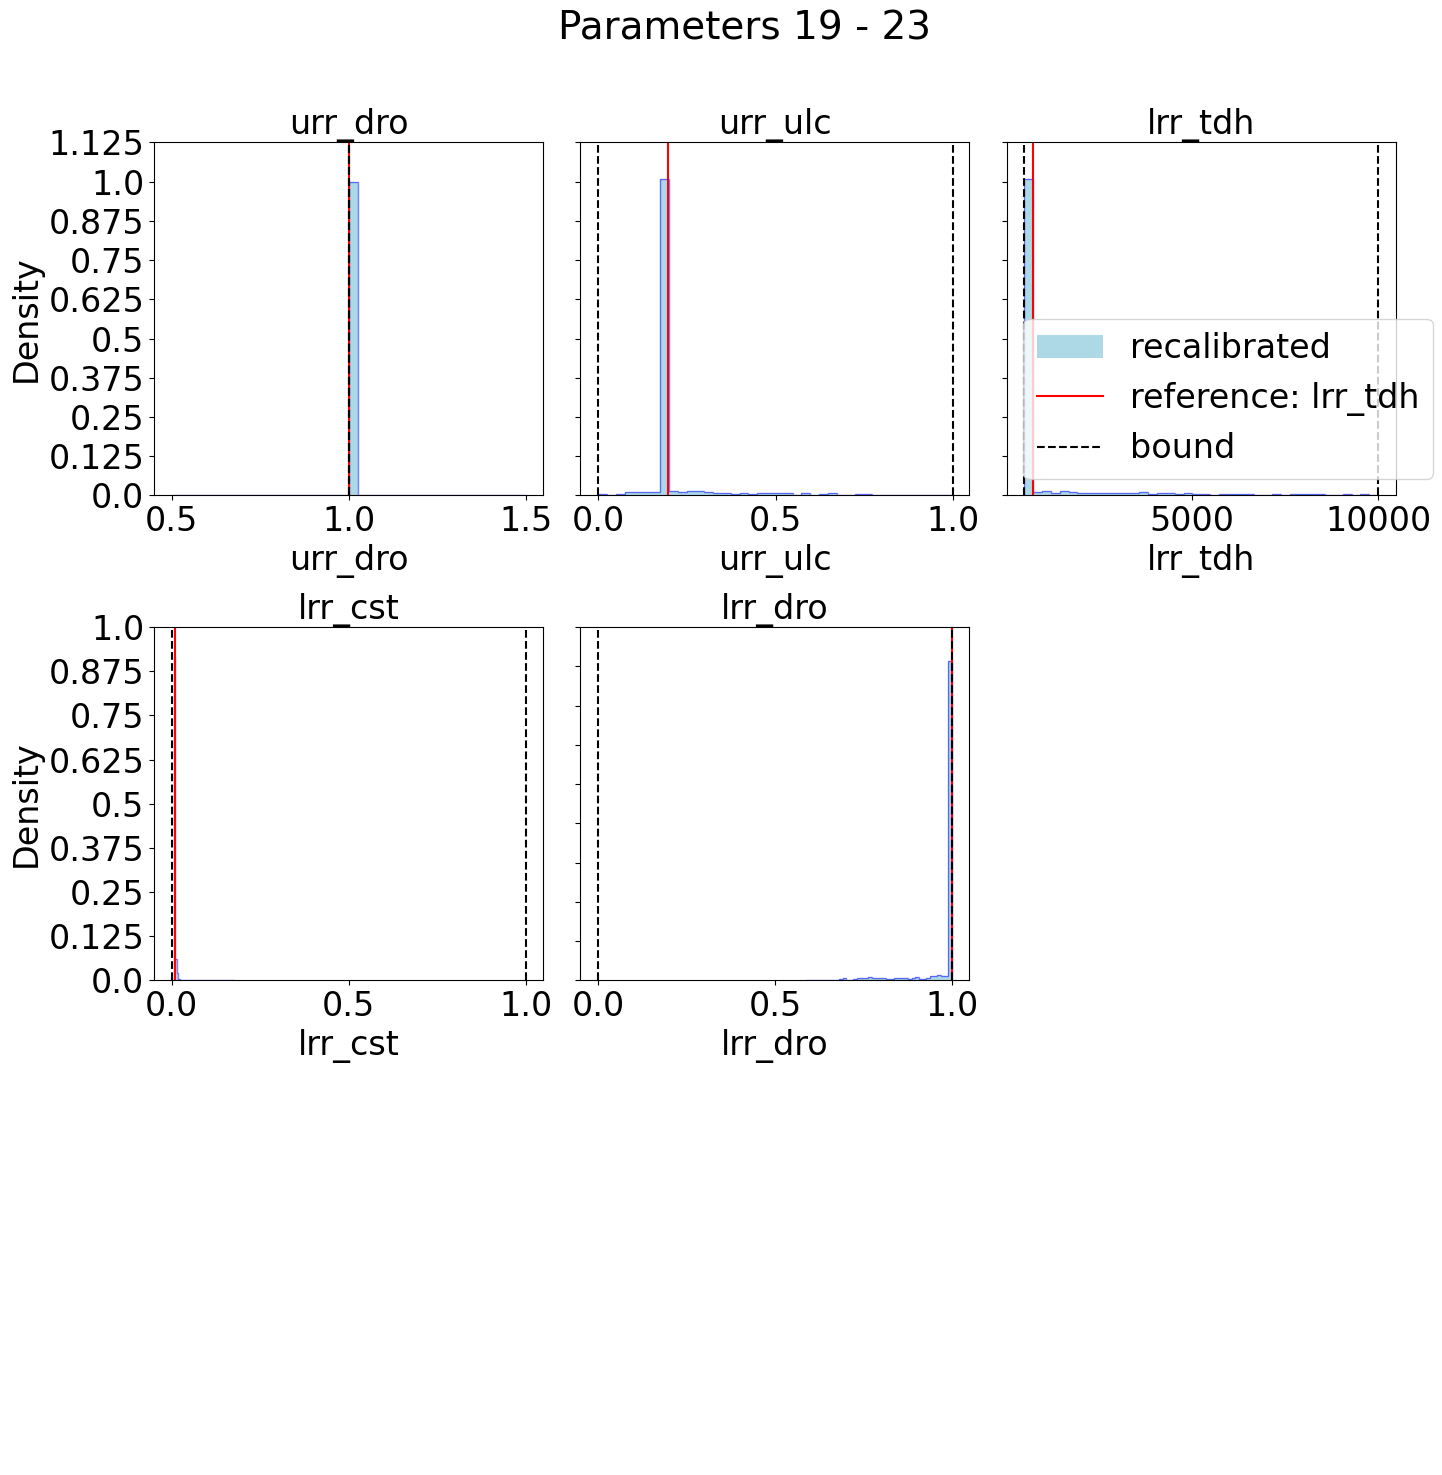

In [8]:
# Function to plot a 3x3 grid of subplots

# import seaborn as sns

def plot_3x3(recalib_params, start_index, title):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    fig.suptitle(title, fontsize=28)
    
    for i, ax in enumerate(axes.flat):
        param_index = start_index + i
        if param_index < recalib_params.shape[1]:
            param_name = list(bounds.keys())[param_index]
            param_bounds = bounds[param_name]
            ax.hist(recalib_params[:, param_index], bins=40, density=False, histtype='stepfilled', color='lightblue', label='recalibrated')
            ax.hist(recalib_params[:, param_index], bins=40, density=False, histtype='step', color='blue', alpha=0.5)
            
            # sns.kdeplot(recalib_params[:, param_index], color='blue', label=f'recalibrated: {param_name}')
            ax.axvline(ref_params[param_index], color='red', label=f'reference: {param_name}')
            ax.axvline(param_bounds[0], color='black', linestyle='--', label='bound')
            ax.axvline(param_bounds[1], color='black', linestyle='--')
            locs = ax.get_yticks() 
            ax.set_yticks(locs)
            ax.set_yticklabels(np.round(locs/len(recalib_params[:, param_index]), 3))
            ax.set_xlabel(param_name, fontsize=24)
            ax.tick_params(axis='x', labelsize=24)
            ax.tick_params(axis='y', labelsize=24)
            ax.set_title(f'{param_name}', fontsize=24)
            if i % 3 == 0:
                ax.set_ylabel('Density', fontsize=24)
            else:
                ax.set_yticklabels([])
            if i == 2:
                ax.legend(fontsize=24)
        else:
            ax.axis('off')  # Turn off the axis if there's no data for this subplot

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot the first 3x3 grid
plot_3x3(recalib_params, 0, 'Parameters 1 - 9')

# Plot the second 3x3 grid
plot_3x3(recalib_params, 9, 'Parameters 10 - 18')

# Plot the third 3x3 grid
plot_3x3(recalib_params, 18, 'Parameters 19 - 23')

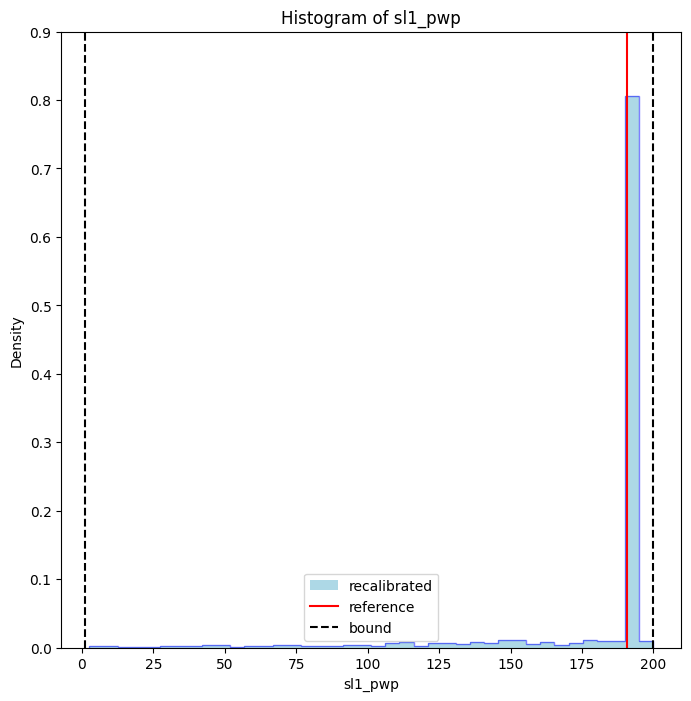

In [9]:
# Plot one specific parameter in a big figure
param_name = 'sl1_pwp'
param_index = list(bounds.keys()).index(param_name)
param_bounds = bounds[param_name]

fig = plt.figure(figsize=(8, 8))
plt.hist(recalib_params[:, param_index], bins=40, density=False, histtype='stepfilled', color='lightblue', label='recalibrated')
plt.hist(recalib_params[:, param_index], bins=40, density=False, histtype='step', color='blue', alpha=0.5)
locs, _ = plt.yticks() 
plt.yticks(locs,np.round(locs/len(recalib_params[:, param_index]),3))
plt.axvline(ref_params[param_index], color='red', label='reference')
plt.axvline(param_bounds[0], color='black', linestyle='--', label='bound')
plt.axvline(param_bounds[1], color='black', linestyle='--')
plt.xlabel(param_name)
plt.ylabel('Density')
plt.legend()
plt.title(f'Histogram of {param_name}')
plt.show()

Model runtime: 3.55E-04 seconds.
Model runtime: 3.40E-04 seconds.
Model runtime: 3.38E-04 seconds.
Model runtime: 3.75E-04 seconds.
Model runtime: 3.27E-04 seconds.
Model runtime: 2.21E-04 seconds.
Model runtime: 2.15E-04 seconds.
Model runtime: 2.18E-04 seconds.
Model runtime: 2.13E-04 seconds.
Model runtime: 2.13E-04 seconds.
Model runtime: 2.13E-04 seconds.
Model runtime: 2.13E-04 seconds.
Model runtime: 3.44E-04 seconds.
Model runtime: 3.38E-04 seconds.
Model runtime: 3.37E-04 seconds.
Model runtime: 3.40E-04 seconds.
Model runtime: 3.39E-04 seconds.
Model runtime: 3.36E-04 seconds.
Model runtime: 3.36E-04 seconds.
Model runtime: 3.36E-04 seconds.
Model runtime: 5.04E-04 seconds.
Model runtime: 5.54E-04 seconds.
Model runtime: 3.41E-04 seconds.
Model runtime: 3.59E-04 seconds.
Model runtime: 1.92E-04 seconds.
Model runtime: 3.37E-04 seconds.
Model runtime: 3.40E-04 seconds.
Model runtime: 3.62E-04 seconds.
Model runtime: 3.53E-04 seconds.
Model runtime: 3.36E-04 seconds.
Model runt

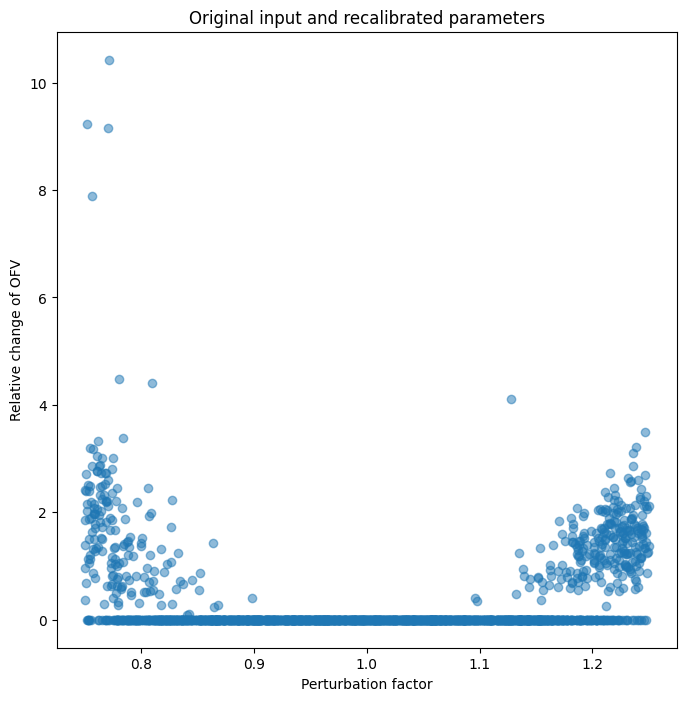

Number of improved cases: 0 of 2000


In [10]:
# Exercise: Scatter

# Relative change against OFV
# OFVs of original input and recalibrated parameters
obj_values_orig_input_recal_params = []
modl_objt = setup_object_with_data(tems=ref_tem, ppts=ref_ppt)
diso = get_diso()
for i in range(num):
    obj_values_orig_input_recal_params.append(objective_function(recalib_params[i], diso, modl_objt, efficieny_metric=NSE))
obj_values_orig_input_recal_params = np.array(obj_values_orig_input_recal_params)

# Calculate relative change
relative_change = (obj_values_orig_input_recal_params - ref_obj_value) / ref_obj_value

# Scatter plot
fig = plt.figure(figsize=(8, 8))
plt.scatter(perturbation_factors, relative_change, alpha=0.5)
plt.xlabel('Perturbation factor')
plt.ylabel('Relative change of OFV')
plt.title('Original input and recalibrated parameters')
plt.show()

# Number of improved cases
print(f'Number of improved cases: {np.sum(relative_change < 0)} of {num}')

Model runtime: 3.59E-04 seconds.
Model runtime: 3.66E-04 seconds.
Model runtime: 2.37E-04 seconds.
Model runtime: 3.68E-04 seconds.
Model runtime: 2.37E-04 seconds.
Model runtime: 3.45E-04 seconds.
Model runtime: 2.30E-04 seconds.
Model runtime: 2.58E-04 seconds.
Model runtime: 2.40E-04 seconds.
Model runtime: 2.31E-04 seconds.
Model runtime: 2.23E-04 seconds.
Model runtime: 2.34E-04 seconds.
Model runtime: 2.41E-04 seconds.
Model runtime: 2.49E-04 seconds.
Model runtime: 3.44E-04 seconds.
Model runtime: 3.42E-04 seconds.
Model runtime: 2.75E-04 seconds.
Model runtime: 2.61E-04 seconds.
Model runtime: 2.28E-04 seconds.
Model runtime: 3.79E-04 seconds.
Model runtime: 2.39E-04 seconds.
Model runtime: 1.50E-03 seconds.
Model runtime: 4.83E-04 seconds.
Model runtime: 3.67E-04 seconds.
Model runtime: 2.22E-04 seconds.
Model runtime: 2.60E-04 seconds.
Model runtime: 3.62E-04 seconds.
Model runtime: 5.29E-04 seconds.
Model runtime: 4.89E-04 seconds.
Model runtime: 2.37E-04 seconds.
Model runt

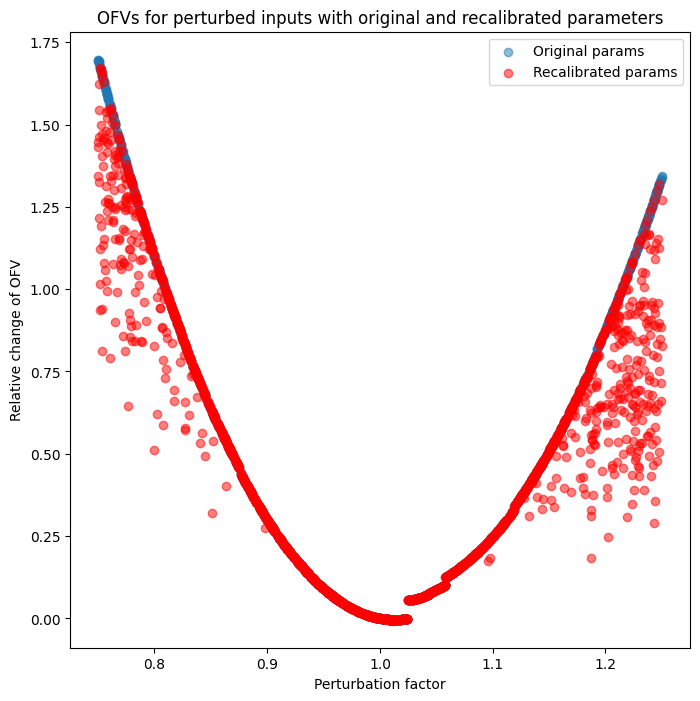

Number of improved cases: 2000 of 2000


In [14]:
# Exercise: Scatter OFV

# OFVs perturbed inputs for recalibrated parameters: recalib_obj_values

# OFVs perturbed inputs for original opt. parameters
obj_values_pert_input_orig_params = []
for i in range(num):
    modl_objt = setup_object_with_data(tems=tems[i], ppts=ppts[i])
    diso = get_diso()
    obj_values_pert_input_orig_params.append(objective_function(ref_params, diso, modl_objt, efficieny_metric=NSE))

relative_change_orig_params = (obj_values_pert_input_orig_params - ref_obj_value) / ref_obj_value
relative_change_recab_params = (recalib_obj_values - ref_obj_value) / ref_obj_value

fig = plt.figure(figsize=(8, 8))
plt.scatter(perturbation_factors, relative_change_orig_params, alpha=0.5, label='Original params')
plt.scatter(perturbation_factors, relative_change_recab_params, alpha=0.5, color='red', label='Recalibrated params')
plt.legend()
plt.xlabel('Perturbation factor')
plt.ylabel('Relative change of OFV')
plt.title('OFVs for perturbed inputs with original and recalibrated parameters')
plt.show()

# Number of improved cases
print(f'Number of improved cases: {np.sum(relative_change_recab_params <= relative_change_orig_params)} of {num}')